## Multiple Linear Regression In-Class Exercise

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

### Download Data

In [4]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst = 'data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File data.csv is already downloaded


In [5]:
df = pd.read_csv('data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In this exercise, the target variable will be the concrete strength in Megapascals, csMPa. We will use the other 8 attributes as predictors to predict the strength.

Create a list called xnames of the 8 names of the predictors. You can do this as follows:
    - Get the list of names of the columns from df.columns.tolist()
    - Remove the last items from the list using indexing

In [9]:
xnames = df.columns.tolist()[:-1]
xnames

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

Get the data matrix X and target vector y from the dataframe df.
Recall that to get the items from a dataframe, you can use syntax such as:
```python
    s = np.array(df['slag'])
```

which gets the data in the column slag and puts it into an array s. You can also get multiple columns with syntax like
```python
    X12 = np.array(df['cement', 'slag'])

In [11]:
X = np.array(df[xnames])
y = np.array(df['csMPa'])
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


Using the subplot command, create two plots, side-by-side with:
    - y vs. the cement on the left (attribute 0)
    - y vs. the water on the right (attribute 3) Label the axes and use the plt.tight_layout() to adjust the plots nicely at the end

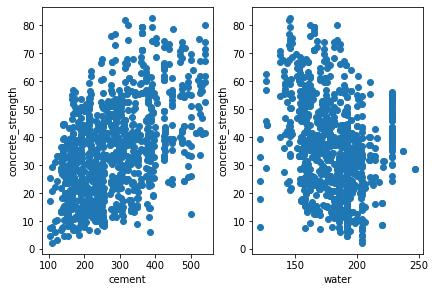

In [13]:
plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.xlabel('cement')
plt.ylabel('concrete_strength')
plt.subplot(1,2,2)
plt.scatter(X[:,3], y)
plt.xlabel('water')
plt.ylabel('concrete_strength')
plt.tight_layout(pad = 0.5)

### Split the Data into Training and Test

Split the data into training and test. Use 30% for test and 70% for training. You can do the splitting manually or use the sklearn package train_test_split. Store the training data and test data.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


### Fit a Linear Model

Creat a linear regression model object and fit the model on the training data.

In [17]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Compute the predicted values yhat_train on the training data and print the R^2 value on the training data.

In [19]:
yhat_train = regression.predict(X_train)
RSS_train = np.mean((yhat_train - y_train) ** 2) / (np.std(y_train) ** 2)
Rsq_train = 1 - RSS_train
print('RSS train = {}'.format(RSS_train))
print('Rsq train = {}'.format(Rsq_train))

RSS train = 0.3821746410990704
Rsq train = 0.6178253589009296


Now compute the predicted values yhat_ts on the test data and print the R^2 value on the test data

In [22]:
yhat_test = regression.predict(X_test)
RSS_test = np.mean((yhat_test - y_test) ** 2) / (np.std(y_test) ** 2)
Rsq_test = 1 - RSS_test
print('RSS test = {}'.format(RSS_test))
print('Rsq test = {}'.format(Rsq_test))

RSS test = 0.3956424003749573
Rsq test = 0.6043575996250428


Create a scatter plot of the actual vs. predicted values of y on the test data

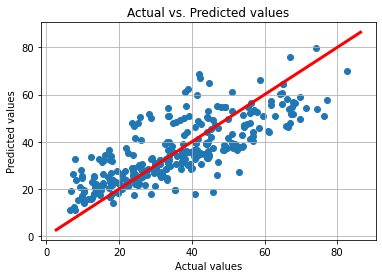

In [25]:
plt.scatter(y_test, yhat_test)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle = '-', color = 'r', linewidth = 3)
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

In [ ]:
plt.scatter(x_test, 